# Uso de validación cruzada (CrossValidation)

---



**Autor:** Jazna Meza Hidalgo

**Correo Electrónico:** ja.meza@profesor.duoc.cl

**Fecha de Creación:** Mayo 2025

**Versión:** 1.0  



---

## Descripción

En este notebook haremos una clasificación con SVM al problema ya visto: Iris, pero en esta oportunidad se revisará como funciona el Cross-Validation

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- numpy (2.0.2)
- pandas (2.2.2)
- sklearn (1.6.1)
- seaborn (0.13.2)
- matplotlib (3.10.0)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import pandas as pd
print(pd.__version__)
````

![](https://stephenallwright.com/content/images/2022/06/cross_val_score-and-cross_validate-method.png)

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [2]:
# Extrae los datos y las etiquetas
X, y = load_iris(return_X_y=True)

In [3]:
# Divide en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=29)

In [4]:
# Crea el modelo
model = SVC(kernel='linear', C=1)

❗ Al crear el modelo con un kernel lineal se está asumiendo que existe separación lineal. En la sección de `Bonus Track` hay más detalle de esto

In [5]:
# Entrena
model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [6]:
# Obtener el accuracy. Esta es una forma rápida de obtener la métrica, pero solo es el accuracy.
model.score(X_test, y_test)

0.9777777777777777

In [7]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        17

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## Cross-Validation

In [8]:
# Obtendra 5 resultados, ya que cv=5. Si cambia este valor, la cantidad de resultados cambiara.
scores = cross_val_score(model, X_train, y_train, cv=5)
print(scores)

[1.         0.95238095 1.         0.95238095 1.        ]


Modifique el parámetro "cv" y vea como cambian los resultados.

¿Observan que dependiendo que datos toquen en la aleatoriedad es el resultado que entrega?

Una forma de entregar un resumen como resultado es calcular el promedio y la desviación estandar

In [9]:
print("{0:<25} : {1:.2f}".format("El promedio es", np.mean(scores)))
print("{0:<25} : {1:.2f}".format("La desviacion estandar es", np.std(scores) ))

El promedio es            : 0.98
La desviacion estandar es : 0.02


## Análisis

¿Qué dice este resultado? ¿es confiable el comportamiento del algoritmo?

### Otra función que entrega un poco más de información.

In [10]:
cv_results = cross_validate(model, X_train, y_train, cv=5)

In [11]:
cv_results.keys()

dict_keys(['fit_time', 'score_time', 'test_score'])

###Revise los resultados que entrega

In [12]:
cv_results['fit_time']

array([0.00748634, 0.00185609, 0.0017035 , 0.00183129, 0.00158882])

Sería interesante obtener el resultado del entrenamiento del proceso.

Revise en la documentación [Acá](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate) y averigue como hacerlo.

In [ ]:
# Escriba su código aquí.

# Bonus track

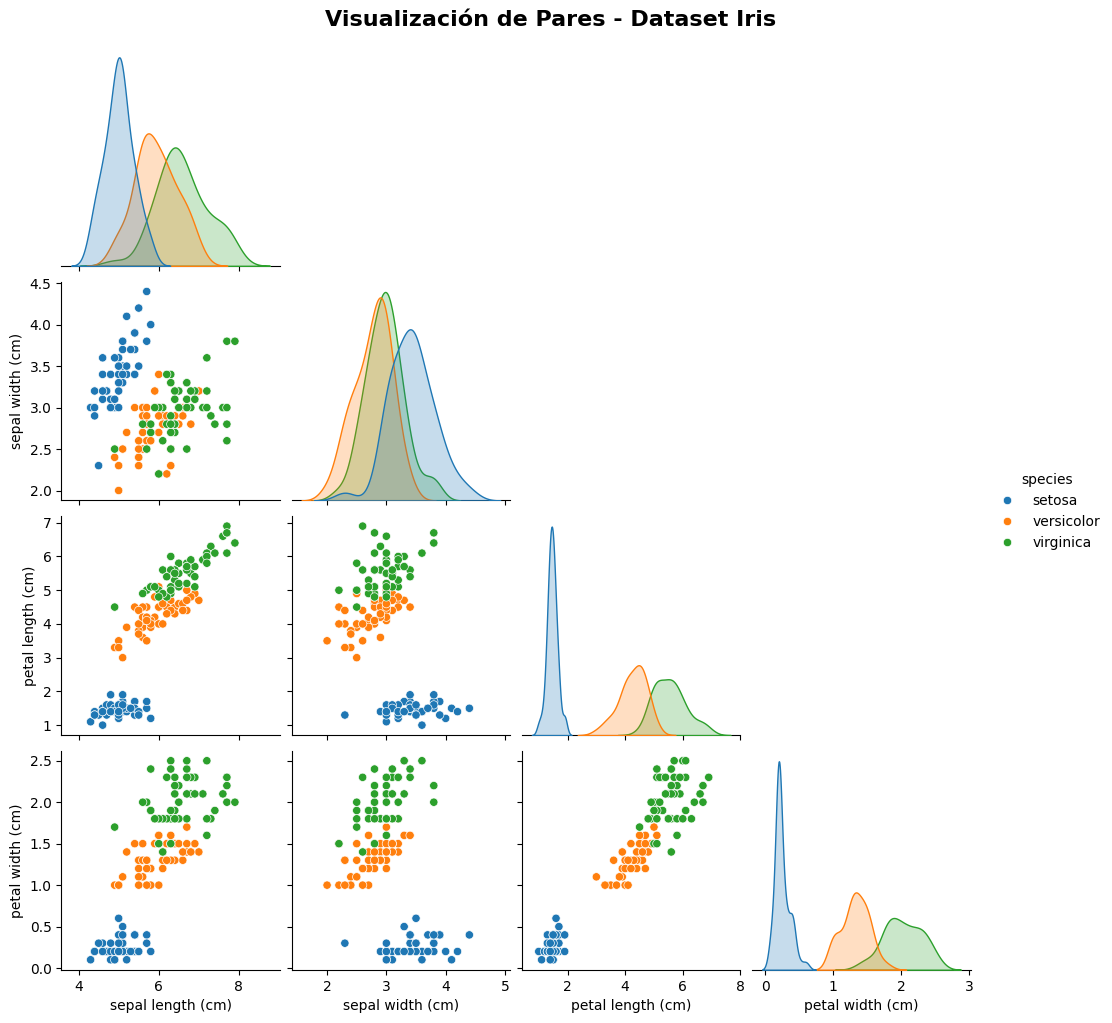

In [18]:
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Crear DataFrame
data_iris = pd.DataFrame(X, columns=feature_names)
data_iris['species'] = [target_names[label] for label in y]  # convertir 0,1,2 a nombres

# Pairplot
sns.pairplot(data_iris, hue="species", corner=True)
plt.suptitle("Visualización de Pares - Dataset Iris", fontsize=16, fontweight="bold", y=1.02)
plt.show()

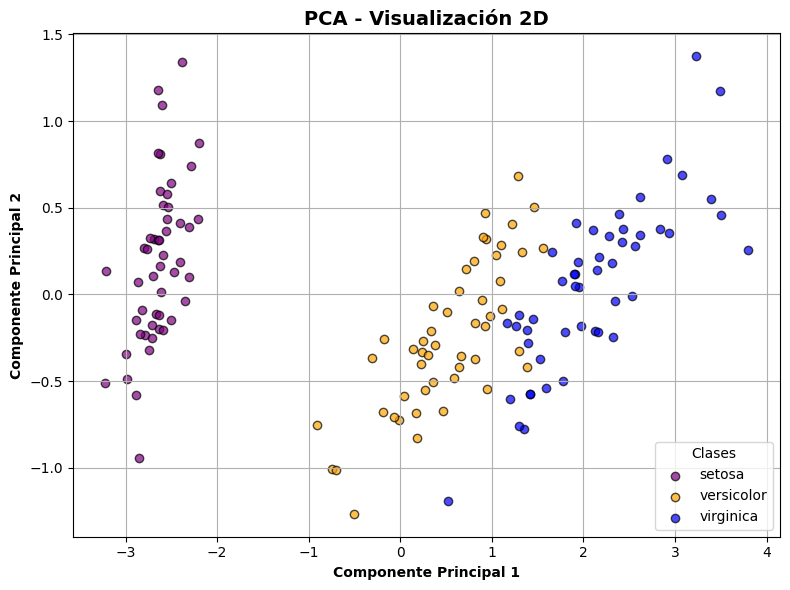

In [22]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
# Colores por clase
colors = ['purple', 'orange', 'blue']

# Crear gráfico con leyendas
plt.figure(figsize=(8, 6))
for i, color, label in zip([0, 1, 2], colors, target_names):
    plt.scatter(
        X_pca[y == i, 0], X_pca[y == i, 1],
        color=color, label=label, edgecolor='k', alpha=0.7
    )

plt.xlabel("Componente Principal 1", fontweight="bold")
plt.ylabel("Componente Principal 2", fontweight="bold")
plt.title("PCA - Visualización 2D", fontsize=14, fontweight="bold")
plt.legend(title="Clases", loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()

## Compara kernel con CV

Siempre es bueno comparar kernels y visualizar los datos antes de asumir linealidad. En muchos casos, el kernel RBF entrega una mejor generalización si hay curvas o fronteras no lineales entre clases.

In [23]:
for kernel in ['linear', 'rbf', 'poly', 'sigmoid']:
  svc = SVC(kernel=kernel)
  scores = cross_val_score(svc, X, y, cv=5)
  print(f"Kernel: {kernel}, Accuracy: {scores.mean():.4f}")


Kernel: linear, Accuracy: 0.9800
Kernel: rbf, Accuracy: 0.9667
Kernel: poly, Accuracy: 0.9800
Kernel: sigmoid, Accuracy: 0.0667
